In [26]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型
import pandas as pd
from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [27]:
#采用 pca 保留16维特征的数据
pca_train_data_file = "./data/process_train.csv"
pca_test_data_file =  "./data/process_test.csv"

train_data = pd.read_csv(pca_train_data_file, sep=',', encoding='utf-8')
test_data = pd.read_csv(pca_test_data_file, sep=',', encoding='utf-8')
new_train_pca_16 = train_data.fillna(0)
train = new_train_pca_16[train_data.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

In [28]:
new_train_pca_16.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2886.000000,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2886.000000
mean,3.939253e-17,0.000000,1.969626e-17,4.924066e-18,6.893693e-17,-2.585135e-17,5.908879e-17,-6.278184e-17,-9.601929e-17,1.194086e-16,-7.016794e-17,1.120225e-16,-1.231017e-18,-3.939253e-17,-4.185456e-17,8.924870e-17,0.127185
std,3.998976e-01,0.350024,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,1.193301e-01,1.149757e-01,1.133507e-01,1.019259e-01,0.983126
min,-1.071795e+00,-0.942948,-9.948316e-01,-7.103086e-01,-7.703987e-01,-5.340286e-01,-5.993764e-01,-5.870697e-01,-6.282749e-01,-4.902647e-01,-6.340463e-01,-5.906469e-01,-4.175135e-01,-4.311070e-01,-4.169906e-01,-3.601460e-01,-3.044000
25%,-2.804085e-01,-0.261373,-2.090797e-01,-1.945196e-01,-1.315620e-01,-1.264090e-01,-1.236356e-01,-1.016477e-01,-9.662436e-02,-9.296823e-02,-8.202294e-02,-7.719893e-02,-7.134715e-02,-7.471739e-02,-7.700447e-02,-6.605244e-02,-0.347500
50%,-1.417104e-02,-0.012772,2.112164e-02,-2.337399e-02,-5.122878e-03,-1.355367e-02,-1.745890e-04,-4.656240e-03,2.575781e-03,-1.477202e-03,7.276437e-03,-5.697715e-03,-4.139221e-03,1.038501e-03,-1.790570e-03,-7.493705e-04,0.312500
75%,2.287306e-01,0.231772,2.069571e-01,1.657590e-01,1.281660e-01,9.993095e-02,1.272075e-01,9.657206e-02,1.002697e-01,9.059545e-02,8.834017e-02,7.148620e-02,6.776741e-02,7.577765e-02,7.113513e-02,6.362831e-02,0.793750
max,1.597730e+00,1.382802,1.010250e+00,1.448007e+00,1.034061e+00,1.358962e+00,6.191595e-01,7.370164e-01,6.448517e-01,5.839584e-01,6.405842e-01,6.779427e-01,5.157198e-01,4.978179e-01,4.674310e-01,4.570133e-01,2.538000


定义绘制模型学习曲线函数

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    print(train_scores_mean)
    print(test_scores_mean)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

线性回归

In [30]:
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    4.2299817114042705e-31


[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]


<module 'matplotlib.pyplot' from 'd:\\pycharmprojects\\myproject\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

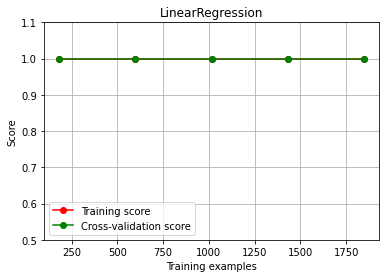

In [31]:

X = train_data.values
y = train_target.values
# 图一
title = r"LinearRegression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 1.1), cv=cv, n_jobs=1)

k近邻回归

[0.97405846 0.98571823 0.98841474 0.98971206 0.99056085]
[0.96649716 0.98142671 0.98475336 0.98650507 0.98772229]


<module 'matplotlib.pyplot' from 'd:\\pycharmprojects\\myproject\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

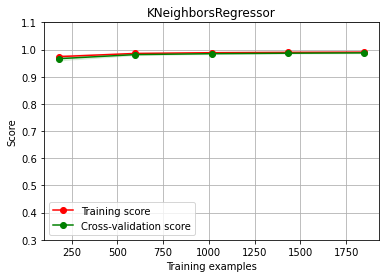

In [32]:
X = train_data.values
y = train_target.values

# K近邻回归
title = r"KNeighborsRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsRegressor(n_neighbors=8)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.3, 1.1), cv=cv, n_jobs=1)

决策树回归

In [33]:
clf = DecisionTreeRegressor()
clf.fit(train_data, train_target)

score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    8.157266435986168e-05


[1. 1. 1. 1. 1.]
[0.99031089 0.99853157 0.99940641 0.99966686 0.99976407]


<module 'matplotlib.pyplot' from 'd:\\pycharmprojects\\myproject\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

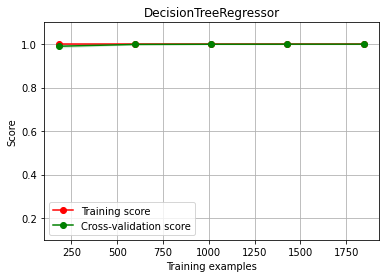

In [34]:
X = train_data.values
y = train_target.values

# 决策树回归
title = r"DecisionTreeRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeRegressor()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.1), cv=cv, n_jobs=1)

随机森林回归

In [35]:
clf = RandomForestRegressor(n_estimators=200) # 200棵树模型
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    2.584169935121232e-05


lgb回归模型

In [37]:
# lgb回归模型
clf = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective='regression',
    )

# 训练模型
clf.fit(
        X=train_data, y=train_target,
        eval_metric='MSE',
        verbose=50
    )

score = mean_squared_error(test_target, clf.predict(test_data))
print("lightGbm:   ", score)

lightGbm:    0.0005402758726609755


[0.81582141 0.85994239 0.8638794  0.8644675  0.86489335]
[0.80844426 0.85840262 0.86305761 0.86388367 0.86442525]


<module 'matplotlib.pyplot' from 'd:\\pycharmprojects\\myproject\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

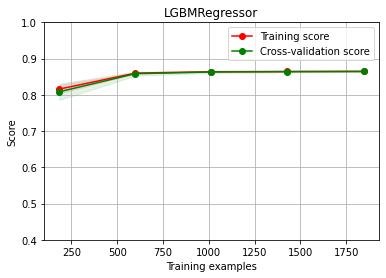

In [38]:
X = train_data.values
y = train_target.values

# K近邻回归
title = r"LGBMRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = lgb.LGBMRegressor(
    learning_rate=0.01,
    max_depth=-1,
    n_estimators=100,
    boosting_type='gbdt',
    random_state=2019,
    objective='regression'
    )    #建模

plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.0), cv=cv, n_jobs=1)

随机森林的随机参数优化&网格优化

In [39]:
from sklearn.model_selection import RandomizedSearchCV
randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200, 300],
              'max_depth':[1, 2, 3, 4, 5]
        }
clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))
print("Best parameters:{}".format(clf.best_params_))
print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

Best parameters:{'n_estimators': 300, 'max_depth': 5}
RandomForestRegressor RandomizedSearchCV test MSE:    0.00026393551203023096


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
from sklearn.model_selection import GridSearchCV
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200],
              'max_depth':[1, 2, 3]
        }


clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

绘制学习曲线、验证曲线

<module 'matplotlib.pyplot' from 'd:\\pycharmprojects\\myproject\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

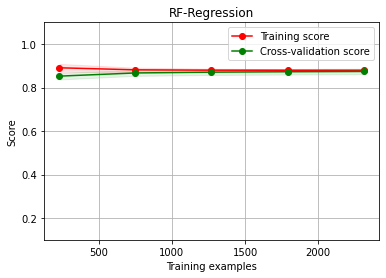

In [55]:
pca_train_data_file = "./data/zhengqi_train.txt"
pca_test_data_file =  "./data/zhengqi_test.txt"
train_data = pd.read_csv(pca_train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(pca_test_data_file, sep='\t', encoding='utf-8')
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = train_data[test_data.columns].values
y = train_data['target'].values


title = "RF-Regression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = model_selection.ShuffleSplit(X.shape[0],
                                   test_size=0.2, random_state=0)

# estimator = RandomForestRegressor(n_estimators=300,max_depth=5)
estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.1), cv=cv, n_jobs=-1)

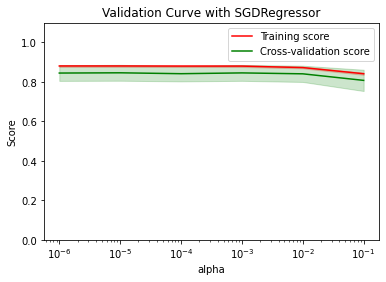

In [56]:
from sklearn.model_selection import validation_curve

X = train_data[test_data.columns].values
y = train_data['target'].values
# max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(
    SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1'), X, y, param_name="alpha", param_range=param_range,
    cv=10, scoring='r2', n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()